In [1]:
include("OQS_Tools_v1.jl")
using Plots
using LinearAlgebra
using PolyChaos
using .OQS_Tools_v1
using JLD2
BLAS.set_num_threads(4)

In [2]:
bath_shape = "elliptical" #change me
Ds = [1.0]
gs = [0.1,0.3,0.8]
betas = [1.0,10.0,100.0,1000.0]
mus = [-0.2,-0.1,0.0,0.1,0.2]
N = 50
dt = 0.1
Esys = 0.0
sys = N+1
sys_occs = collect(0.0:0.02:1.0)

save_dir = "/Users/ben/test_data_project"  

"/Users/ben/test_data_project"

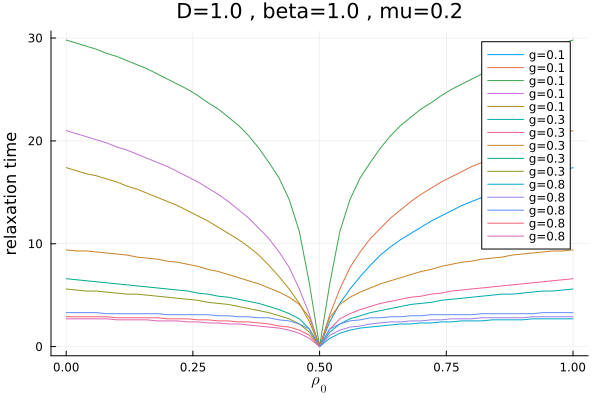

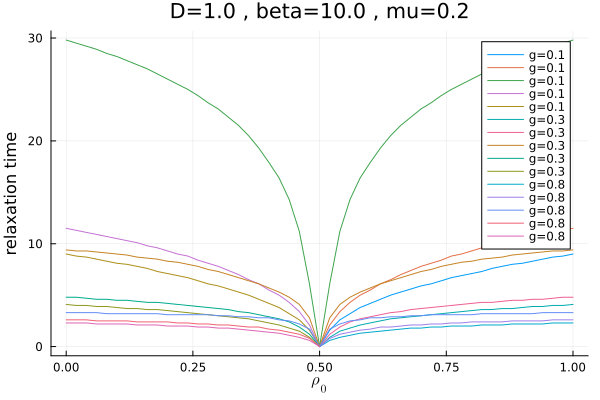

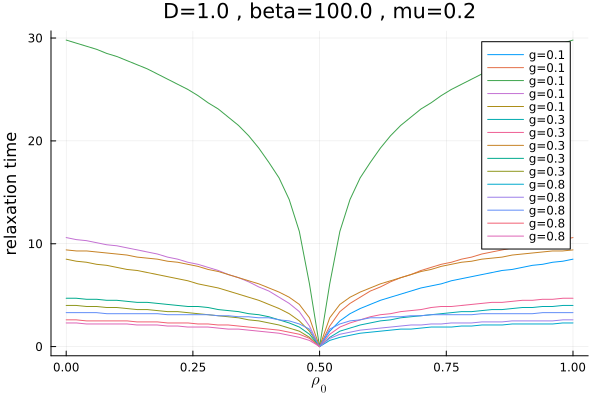

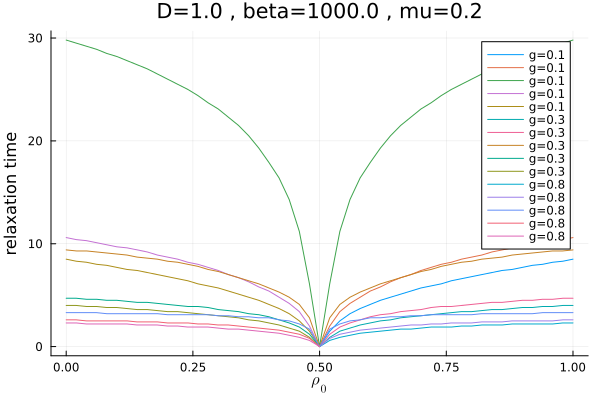

In [ ]:
    for beta in betas
        for D in Ds
            p = plot()
            for g  in gs
            
                filename = joinpath(save_dir, "exact_occs_$(bath_shape)D$(D)g$(g)Esys$(Esys)beta$(beta)mu$(mu)dt$(dt).jld2")
                @load filename times data
                relaxation = zeros(length(sys_occs))
                for i in 1:length(sys_occs)
                    idx = findfirst(abs.(data[i] .- 0.5) .< 0.01)
                    if idx !== nothing 
                        relaxation[i] = times[idx]
                    else
                        relaxation[i] = NaN
                    end
                end 
                plot!(p, sys_occs, relaxation, title="D=$D , beta=$beta , mu=$mu",label="g=$g",
                xlabel="\$ \\rho_0 \$", ylabel="relaxation time")
                
            end
            display(p)
        end
    end
